In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = nx.read_gpickle("graph.gexf")

## Degree distribution

In [3]:
degree_dist = []
for node in graph.nodes:
    degree_dist.append(len(graph.edges(node)))

In [4]:
from collections import Counter
degree_count = Counter(degree_dist) 

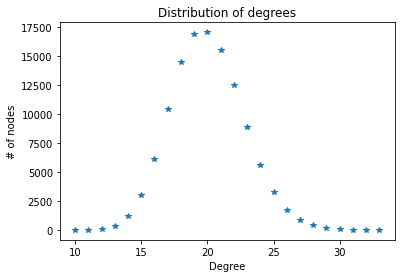

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(list(degree_count.keys()), list(degree_count.values()), '*')
plt.xlabel("Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of degrees")
plt.show()
plt.savefig('pics/degree_dist.png')

## Family distribution

In [10]:
dist = []
for node in graph.nodes:
    cnt = 0
    for edge in graph.edges(node):
        if 'family' in graph[edge[0]][edge[1]]['type']:
            cnt += 1
    dist.append(cnt)

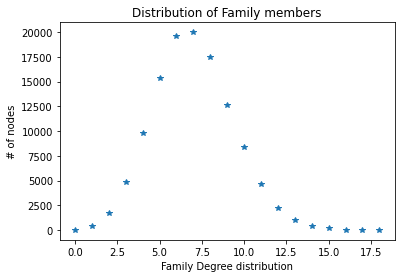

In [12]:
counter = Counter(dist)
plt.plot(list(counter.keys()), list(counter.values()), '*')
plt.xlabel("Family Degree distribution")
plt.ylabel("# of nodes")
plt.title("Distribution of Family members")
plt.savefig('pics/family_degree_dist.svg')
plt.show()

family_counter = Counter(family_dist)
plt.plot(list(family_counter.keys()), list(family_counter.values()), '*')
plt.xlabel("Family Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of Family")
plt.show()

## Colleague distribution

In [13]:
dist = []
for node in graph.nodes:
    cnt = 0
    for edge in graph.edges(node):
        if 'colleague' in graph[edge[0]][edge[1]]['type']:
            cnt += 1
    dist.append(cnt)

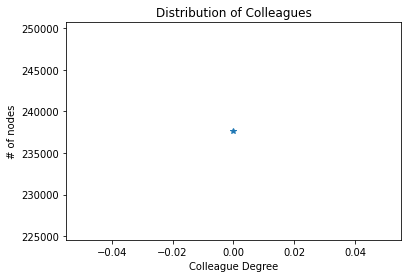

In [28]:
counter = Counter(dist)
plt.plot(list(counter.keys()), list(counter.values()), '*')
plt.xlabel("Colleague Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of Colleagues")
plt.savefig('pics/colleagues_degree_dist.png')
plt.show()

## Household mates

In [15]:
dist = []
for node in graph.nodes:
    cnt = 0
    for edge in graph.edges(node):
        if 'household' in graph[edge[0]][edge[1]]['type']:
            cnt += 1
    dist.append(cnt)

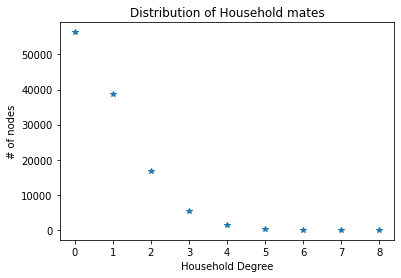

In [16]:
counter = Counter(dist)
plt.plot(list(counter.keys()), list(counter.values()), '*')
plt.xlabel("Household Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of Household mates")
plt.savefig('pics/household_degree_dist.svg')
plt.show()

## Partner Distribution

In [17]:
dist = []
for node in graph.nodes:
    cnt = 0
    for edge in graph.edges(node):
        if 'partner' in graph[edge[0]][edge[1]]['type']:
            cnt += 1
    dist.append(cnt)

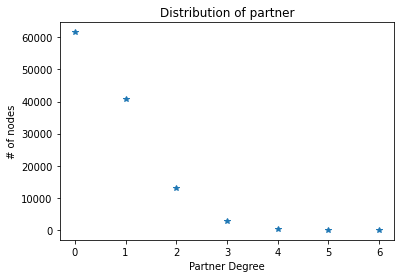

In [18]:
counter = Counter(dist)
plt.plot(list(counter.keys()), list(counter.values()), '*')
plt.xlabel("Partner Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of partner")
plt.savefig('pics/partner_degree_dist.svg')
plt.show()

## Friends in one household

In [19]:
dist = []
for node in graph.nodes:
    cnt = 0
    for edge in graph.edges(node):
        if 'household' in graph[edge[0]][edge[1]]['type'] and 'friend' in graph[edge[0]][edge[1]]['type']:
            cnt += 1
    dist.append(cnt)

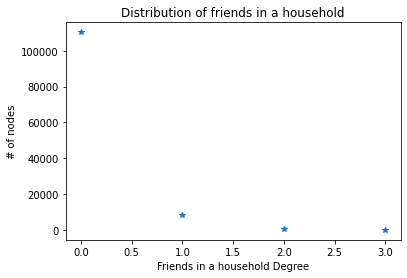

In [20]:
counter = Counter(dist)
plt.plot(list(counter.keys()), list(counter.values()), '*')
plt.xlabel("Friends in a household Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of friends in a household")
plt.savefig('pics/friends_household_degree_dist.svg')
plt.show()

## Colleagues in a household

In [21]:
dist = []
for node in graph.nodes:
    cnt = 0
    for edge in graph.edges(node):
        if 'household' in graph[edge[0]][edge[1]]['type'] and 'colleague' in graph[edge[0]][edge[1]]['type']:
            cnt += 1
    dist.append(cnt)

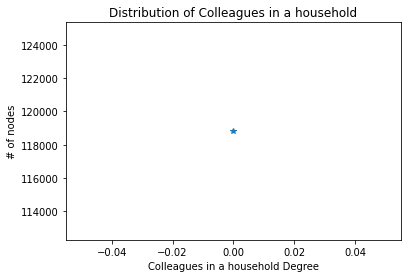

In [22]:
counter = Counter(dist)
plt.plot(list(counter.keys()), list(counter.values()), '*')
plt.xlabel("Colleagues in a household Degree")
plt.ylabel("# of nodes")
plt.title("Distribution of Colleagues in a household")
plt.show()

In [23]:
from collections import defaultdict
from tqdm import tqdm

work_facility_count = defaultdict(int)
home_facility_count = defaultdict(int)

for node in tqdm(graph.nodes):
    cnt = 0
    work_facility_count[graph.nodes[node]['work facility']] += 1
    home_facility_count[graph.nodes[node]['home facility']] += 1
    dist.append(cnt)

100%|██████████| 118820/118820 [00:00<00:00, 253317.36it/s]


In [24]:

work_dist_dict = defaultdict(int)

for key, value in work_facility_count.items():
    work_dist_dict[value] += 1

home_dist_dict = defaultdict(int)

for key, value in home_facility_count.items():
    home_dist_dict[value] += 1


In [25]:
work_dist_dict = sorted(work_dist_dict.items(), key=lambda item: item[0])
home_dist_dict = sorted(home_dist_dict.items(), key=lambda item: item[0])

## House facilities distribution

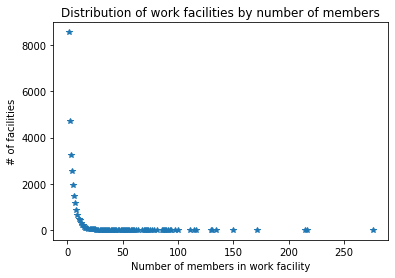

In [26]:
number_members = [item[0] for item in work_dist_dict]
number_facilities = [item[1] for item in work_dist_dict]

plt.plot(number_members, number_facilities, '*')
plt.xlabel("Number of members in work facility")
plt.ylabel("# of facilities")
plt.title("Distribution of work facilities by number of members")
plt.savefig('pics/members_work_facility_degree_dist.svg')
plt.show()

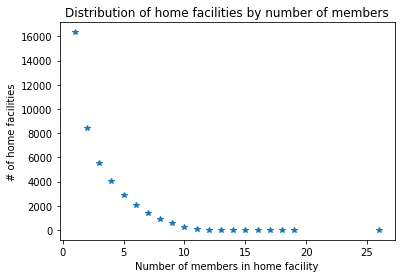

In [29]:
number_members = [item[0] for item in home_dist_dict]
number_facilities = [item[1] for item in home_dist_dict]

plt.plot(number_members, number_facilities, '*')
plt.xlabel("Number of members in home facility")
plt.ylabel("# of home facilities")
plt.title("Distribution of home facilities by number of members")
plt.savefig('pics/home_facilities_number_members_degree_dist.png')
plt.show()

In [23]:
len(graph.nodes)

118820